# Business Sales Performance & Growth Analysis
### Time Series Case Study using Python

## 1. Business Context

A company aims to understand historical sales performance 
to identify growth trends, seasonal demand patterns, 
and support data-driven strategic decisions.

This analysis applies time-series techniques to uncover performance trends and support strategic decision-making.

## 2. Project Objective

- Analyze sales trends over time
- Identify seasonal patterns
- Calculate year-over-year growth
- Translate findings into business recommendations

## 3. Dataset Overview
This dataset contains monthly sales data over a three-year historical period.

Each row represents a year, and each column corresponds to a specific month, 
providing a structured time-series format.

The dataset allows the analysis of:
- Sales growth over time
- Seasonal demand patterns
- Year-over-year performance changes

The structured wide format required transformation into long format using data reshaping techniques to enable proper time-series analysis.

## 4. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Data Loading

In [3]:
df = pd.read_csv("sales.csv")
df.head()

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472


## 6. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    12 non-null     object
 1    "1958"  12 non-null     int64 
 2    "1959"  12 non-null     int64 
 3    "1960"  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [5]:
df.isnull().sum()

Month      0
 "1958"    0
 "1959"    0
 "1960"    0
dtype: int64

In [6]:
df.describe()

,"""1958""","""1959""","""1960"""
count,12.000000,12.000000,12.000000
mean,381.000000,428.333333,476.166667
std,64.530472,69.830097,77.737125
min,310.000000,342.000000,390.000000
25%,339.250000,387.500000,418.500000
50%,360.500000,406.500000,461.000000
75%,411.750000,465.250000,514.750000
max,505.000000,559.000000,622.000000


## 7. Data Preparation 
- Loaded and validated dataset using Pandas.
- Restructured dataset from wide to long format to enable time-series analysis.
- Standardized data types by converting Year to integer.
- Aggregated yearly totals using groupby() to analyze growth trends.

In [7]:
df_long = df.melt(id_vars="Month",
                  var_name="Year",
                  value_name="Sales")

df_long.head()

,Month,Year,Sales
0,JAN,"""1958""",340
1,FEB,"""1958""",318
2,MAR,"""1958""",362
3,APR,"""1958""",348
4,MAY,"""1958""",363


In [8]:
df_long["Year"] = df_long["Year"].astype(str).str.replace('"', '', regex=False).astype(int)

In [9]:
df_long.dtypes
df_long["Year"].head()

0    1958
1    1958
2    1958
3    1958
4    1958
Name: Year, dtype: int64

## 8. Growth Analysis

In [10]:
df_long.groupby("Year")["Sales"].mean()

Year
1958    381.000000
1959    428.333333
1960    476.166667
Name: Sales, dtype: float64

In [11]:
yearly_total = df_long.groupby("Year")["Sales"].sum()
yearly_total

Year
1958    4572
1959    5140
1960    5714
Name: Sales, dtype: int64

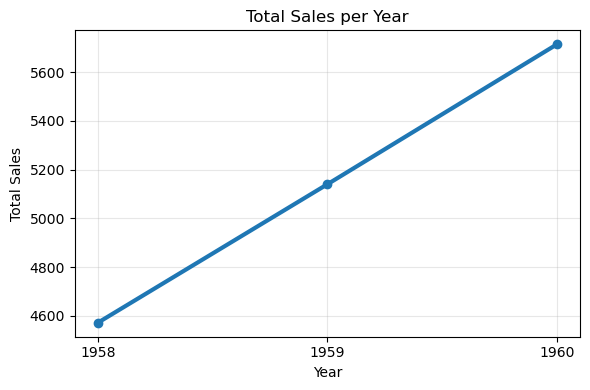

In [12]:
plt.figure(figsize=(6,4))

plt.plot(
    yearly_total.index,
    yearly_total.values,
    marker='o',
    linewidth=3
)

plt.xticks(yearly_total.index)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Year")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

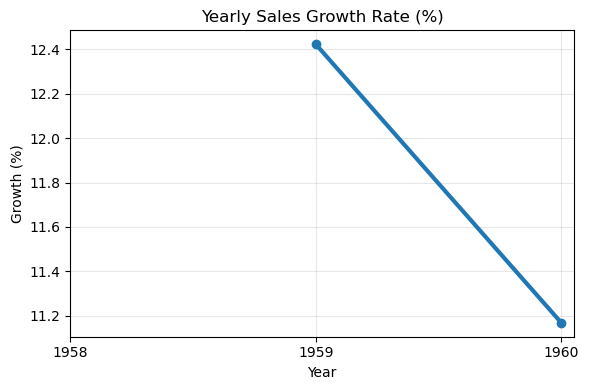

In [13]:
growth = yearly_total.pct_change() * 100

plt.figure(figsize=(6,4))

plt.plot(
    growth.index,
    growth.values,
    marker='o',
    linewidth=3
)

plt.xticks(growth.index)
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.title("Yearly Sales Growth Rate (%)")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Seasonality Analysis
To evaluate seasonal patterns, we calculate the average sales per month across the years and visualize the results.

In [30]:
df_long["Month"] = pd.Categorical(
    df_long["Month"],
    categories=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    ordered=True
)

In [16]:
monthly_avg = (
    df_long.groupby("Month", observed=False)["Sales"]
    .mean()
    .reset_index()
    .rename(columns={"Sales": "Avg_Sales"}))

monthly_avg

,Month,Avg_Sales
0,APR,401.666667
1,AUG,556.666667
2,DEC,391.333333
3,FEB,350.333333
4,JAN,372.333333
5,JUL,553.666667
6,JUN,480.666667
7,MAR,395.666667
8,MAY,418.333333
9,NOV,354.000000


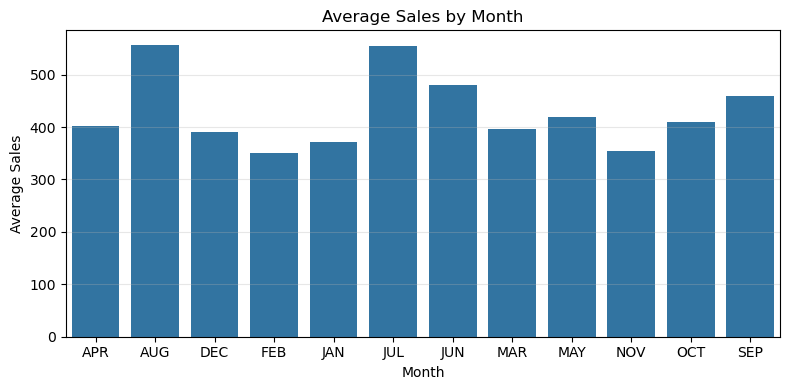

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(data=monthly_avg, x="Month", y="Avg_Sales")

plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Key Insights

- Sales increased consistently across the three-year period, indicating sustained business growth.
- Total cumulative growth over the period was approximately **25%** (based on yearly totals).
- Although sales continued to rise, the year-over-year growth rate showed a slight deceleration in the final year, which may suggest early stabilization.

## 11. Business Interpretation

The business experienced steady expansion during the analyzed period. However, a slight deceleration in growth rate may indicate early signs of stabilization. Monitoring upcoming periods is important to confirm whether this is a temporary fluctuation or a longer-term shift.

From a decision-making perspective, seasonality and growth patterns can support:
- Forecasting and planning
- Inventory/resource allocation during peak periods
- Strategic targets aligned with realistic growth trends

## 12. Next Steps

- Quantify seasonality impact and identify peak months for planning.
- Expand the analysis with additional years (if available) for stronger trend validation.
- Build a simple forecasting baseline (e.g., moving average) to support future planning.